In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

In [2]:
dflife = pd.read_excel('data/gapminder_lifeexpectancy.xlsx', index_col=0)
dffertile = pd.read_csv('data/gapminder_total_fertility.csv', index_col=0)
dfpopulation = pd.read_excel('data/gapminder_population.xlsx', index_col=0)

In [3]:
print(dffertile.shape)            # check dataframe sizes
print(dflife.shape)
print(dfpopulation.shape)

#print(dffertile.columns)          # check column data types
#print(dflife.columns)
dffertile.columns = dffertile.columns.astype(int)       # make sure data types match
#print(dffertile.columns)

# print(dflife.index)               # check index names
# print(dffertile.index)
# print(dfpopulation.index)

dflife.index.name = 'country'
dffertile.index.name = 'country'  # make sure index names match
dfpopulation.index.name = 'country'

# Drop Null values in place
dflife.dropna(inplace=True)
dffertile.dropna(inplace=True)
dfpopulation.dropna(inplace=True)

(260, 216)
(260, 217)
(275, 81)


In [4]:
dffertile = dffertile.reset_index()
dffertile

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.60,6.52,6.43,6.33,6.22,6.10,5.98,5.86,5.75,5.65
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.20,2.18,2.16,2.15,2.13,2.12,2.10,2.09,2.08,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,1.89,1.88,1.86,1.84,1.82,1.79,1.77,1.74,1.72,1.70
195,Virgin Islands (U.S.),5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,5.55,...,2.34,2.39,2.44,2.47,2.49,2.50,2.50,2.49,2.47,2.45
196,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,5.20,5.01,4.83,4.66,4.50,4.35,4.21,4.08,3.95,3.83
197,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59


In [5]:
#bring fertility df to long format

dffertile = dffertile.melt(id_vars='country', var_name='year', value_name='fertility_rate')

#print(dffertile)
#dffertile[dffertile['country']=='Germany']
dffertile

,country,year,fertility_rate
0,Afghanistan,1800,7.00
1,Albania,1800,4.60
2,Algeria,1800,6.99
3,Angola,1800,6.93
4,Antigua and Barbuda,1800,5.00
...,...,...,...
42979,Vietnam,2015,1.70
42980,Virgin Islands (U.S.),2015,2.45
42981,Yemen,2015,3.83
42982,Zambia,2015,5.59


In [6]:
#bring population df to long format

dfpopulation = dfpopulation.reset_index()
dfpopulation = dfpopulation.melt(id_vars='country', var_name='year', value_name='population')
dfpopulation

,country,year,population
0,Afghanistan,1800,3280000.0
1,Albania,1800,410445.0
2,Algeria,1800,2503218.0
3,American Samoa,1800,8170.0
4,Andorra,1800,2654.0
...,...,...,...
18544,Virgin Islands (U.S.),2015,106291.0
18545,Yemen,2015,26832215.0
18546,Zambia,2015,16211767.0
18547,Zimbabwe,2015,15602751.0


In [7]:
#bring life expectancy df to long format

dflife = dflife.reset_index()
dflife = dflife.melt(id_vars='country', var_name='year', value_name='life_expectancy')
dflife

,country,year,life_expectancy
0,Afghanistan,1800,28.21
1,Albania,1800,35.40
2,Algeria,1800,28.82
3,Angola,1800,26.98
4,Antigua and Barbuda,1800,33.54
...,...,...,...
43612,Virgin Islands (U.S.),2016,80.82
43613,Yemen,2016,64.92
43614,Zambia,2016,57.10
43615,Zimbabwe,2016,61.69


In [8]:
df = dffertile.merge(dfpopulation)
df

,country,year,fertility_rate,population
0,Afghanistan,1800,7.00,3280000.0
1,Albania,1800,4.60,410445.0
2,Algeria,1800,6.99,2503218.0
3,Angola,1800,6.93,1567028.0
4,Antigua and Barbuda,1800,5.00,37000.0
...,...,...,...,...
16033,Vietnam,2015,1.70,93447601.0
16034,Virgin Islands (U.S.),2015,2.45,106291.0
16035,Yemen,2015,3.83,26832215.0
16036,Zambia,2015,5.59,16211767.0


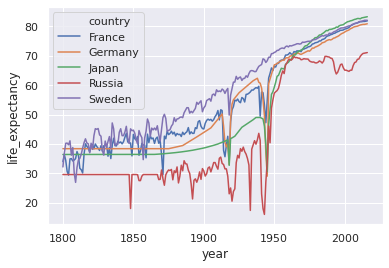

In [9]:
# Life expectancies for various countries - note the drops during the world wars
sns.set()

df_subset = dflife.loc[dflife['country'].isin(['France', 'Germany', 'Sweden', 'Japan', 'Russia'])]
sns_plot = sns.lineplot(x='year', y='life_expectancy', hue='country',
            data=df_subset)

sns_plot.figure.savefig("gapminder-life-expectancies-example.png",dpi=200)

In [10]:
df = dffertile.merge(dflife).merge(dfpopulation)     # merge tables together
df

,country,year,fertility_rate,life_expectancy,population
0,Afghanistan,1800,7.00,28.21,3280000.0
1,Albania,1800,4.60,35.40,410445.0
2,Algeria,1800,6.99,28.82,2503218.0
3,Angola,1800,6.93,26.98,1567028.0
4,Antigua and Barbuda,1800,5.00,33.54,37000.0
...,...,...,...,...,...
15952,Vietnam,2015,1.70,75.40,93447601.0
15953,Virgin Islands (U.S.),2015,2.45,80.60,106291.0
15954,Yemen,2015,3.83,66.00,26832215.0
15955,Zambia,2015,5.59,56.70,16211767.0


In [91]:
# Create separate Life expectancy X Fertility charts with plot size corresponding to population size
sns.set()

for i in range(1960,2016):
    yearly_quantile = df.loc[(df['year']==i),'population'].quantile(.9)
    df_subset = df.loc[(df['year']==i) & (df['population'] > yearly_quantile)]
#    print(yearly_quantile)
    dftemp=df.loc[(df['year']==i)]
    plt.figure(figsize=(10,6))
    plt.axis([10.0, 80.0, 0.0, 10.0])
    sns_plot = sns.scatterplot(x='life_expectancy', y='fertility_rate', hue='country', size='population', sizes=(20,400), data=df_subset).set_title(f"Year: {i}")
#    plt.legend(df_subset['country'])
    sns_plot.figure.savefig(f'animation-frames/life-expectancies{i}.png',dpi=200)
    plt.close()

In [92]:
# Merge figures into animation = gapminder-animation.gif
import imageio

images = []

for i in range(1960, 2016):
    filename = 'animation-frames/life-expectancies{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('gapminder-animation.gif', images, fps=10)

In [ ]:
print(dffertile.shape)            # check dataframe sizes
print(dflife.shape)
print(dfpopulation.shape)
dffertile.to_excel('temp/fertile.xlsx')
dfpopulation.to_excel('temp/population.xlsx')
dflife.to_excel('temp/life.xlsx')

df1 = dffertile.merge(dflife).merge(dfpopulation)
df2 = dfpopulation.merge(dflife).merge(dffertile)
df1.to_excel('temp/df1.xlsx')
df2.to_excel('temp/df2.xlsx')
print(df1.shape)
print(df2.shape)